# 📌 Objective of the Notebook

### This notebook focuses on:
- 📊 **Training and comparing multiple machine learning classification models** for predicting credit scores.
- ✅ **Evaluating model performance** using accuracy and confusion matrices.
- 🧪 Models used include:
  - Logistic Regression
  - Naive Bayes
  - Random Forest
  - XGBoost
  - K-Nearest Neighbors (KNN)
  - Decision Tree
  - Support Vector Machine (SVM)
- 🏆 **Selecting the best-performing model** based on accuracy.
- 🔍 **Visualizing**:
  - A bar plot comparing the accuracy of all models.
  - A **confusion matrix** of the best model to inspect misclassifications.

# 📦 Importing Required Libraries
### These libraries are essential for Loading, Analyzing, Visualizing and Modeling the Data.

In [1]:
# Data Manipulation & Analysis Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Sklearn for Preprocessing and Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

# Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# For Stacked Classifier (Ensemble Learning)
from mlxtend.classifier import StackingCVClassifier

# 📂 Loading the Dataset

### In this section:
- 📥 Load the heart disease dataset into a Pandas DataFrame.
- 👀 Display the first few records to understand the structure and contents.
- 📌 The dataset contains various **health-related attributes** such as:
  - Age
  - Sex
  - Chest pain type
  - Resting blood pressure
  - Cholesterol
  - Maximum heart rate achieved
  - Fasting blood sugar, and more
- 🎯 The **target column** indicates the likelihood of a heart attack:
  - `1` → Presence of heart disease
  - `0` → No heart disease

In [3]:
# Load the dataset
data = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 🔍 3. Exploratory Data Analysis (EDA)

### In this section:
- 📊 Get a deeper understanding of the dataset through visual and statistical analysis.
- 📈 Plot the distribution of the target variable to check for class imbalance.
- 🔗 Analyze **correlation between features** using a heatmap.
- 🚨 Identify any potential outliers or trends that may affect model performance.

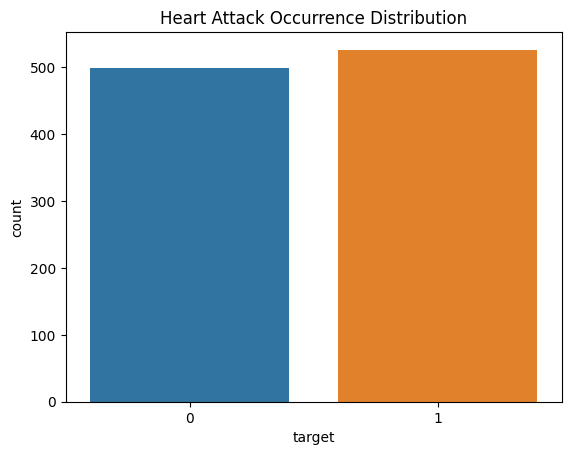

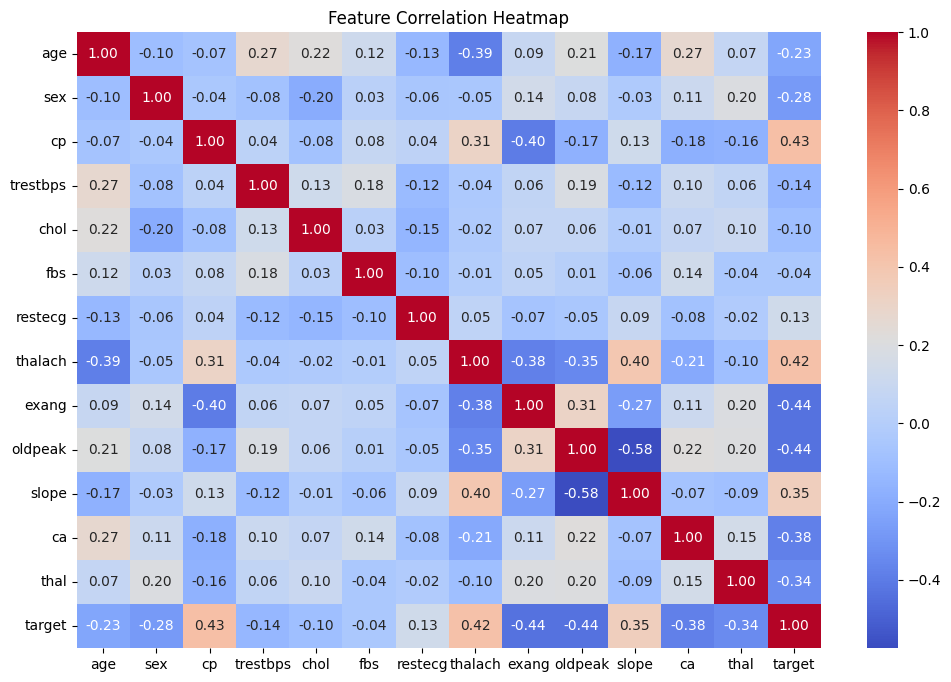

In [4]:
# Check the distribution of the target variable (Heart Attack occurrence)
sns.countplot(x='target', data=data)
plt.title("Heart Attack Occurrence Distribution")
plt.show()

# Quick stats about the features (mean, std, min, max)
data.describe()

# Correlation matrix to observe relationships between numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# 🧹 4. Data Preprocessing

### Here, we will:
- 🧾 Separate the **features (X)** and **target variable (y)**.
- ✂️ Split the dataset into **training** and **testing** sets.
- 📏 Standardize the feature values using **scaling** techniques for improved model performance.

In [5]:
# Separate the target variable from features
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🤖 5. Model Training

### In this part:
- 🏗️ Build multiple classification models:
  - Logistic Regression
  - Naive Bayes
  - Random Forest
  - XGBoost
  - K-Nearest Neighbors (KNN)
  - Decision Tree
  - Support Vector Machine (SVM)
- ⚙️ Train each model on the training data.
- 🧪 Evaluate performance on the test set.

In [6]:
# Logistic Regression Model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
lr_predictions = lr.predict(X_test_scaled)

# Model Evaluation
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
print("Classification Report:\n", classification_report(y_test, lr_predictions))



# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_predictions = nb.predict(X_test_scaled)

# Model Evaluation
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, nb_predictions):.4f}")
print("Classification Report:\n", classification_report(y_test, nb_predictions))



# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_predictions = rf.predict(X_test_scaled)

# Model Evaluation
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print("Classification Report:\n", classification_report(y_test, rf_predictions))



# XGBoost Classifier
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_predictions = xgb.predict(X_test_scaled)

# Model Evaluation
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_predictions):.4f}")
print("Classification Report:\n", classification_report(y_test, xgb_predictions))



# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)

# Model Evaluation
print(f"KNN Accuracy: {accuracy_score(y_test, knn_predictions):.4f}")
print("Classification Report:\n", classification_report(y_test, knn_predictions))



# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_predictions = dt.predict(X_test_scaled)

# Model Evaluation
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_predictions):.4f}")
print("Classification Report:\n", classification_report(y_test, dt_predictions))



# Support Vector Classifier
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train_scaled, y_train)
svc_predictions = svc.predict(X_test_scaled)

# Model Evaluation
print(f"SVM Accuracy: {accuracy_score(y_test, svc_predictions):.4f}")
print("Classification Report:\n", classification_report(y_test, svc_predictions))

Logistic Regression Accuracy: 0.7951
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Naive Bayes Accuracy: 0.8000
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

Random Forest Accuracy: 0.9854
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy 

# 📈 6. Model Evaluation: Accuracy and Confusion Matrix

### In this section:
- 📊 Compare the **accuracy** scores of all trained models.
- 🔍 Use a **bar chart** for side-by-side comparison.
- 🧮 Plot a **confusion matrix** for the best-performing model to analyze:
  - True Positives
  - False Positives
  - True Negatives
  - False Negatives

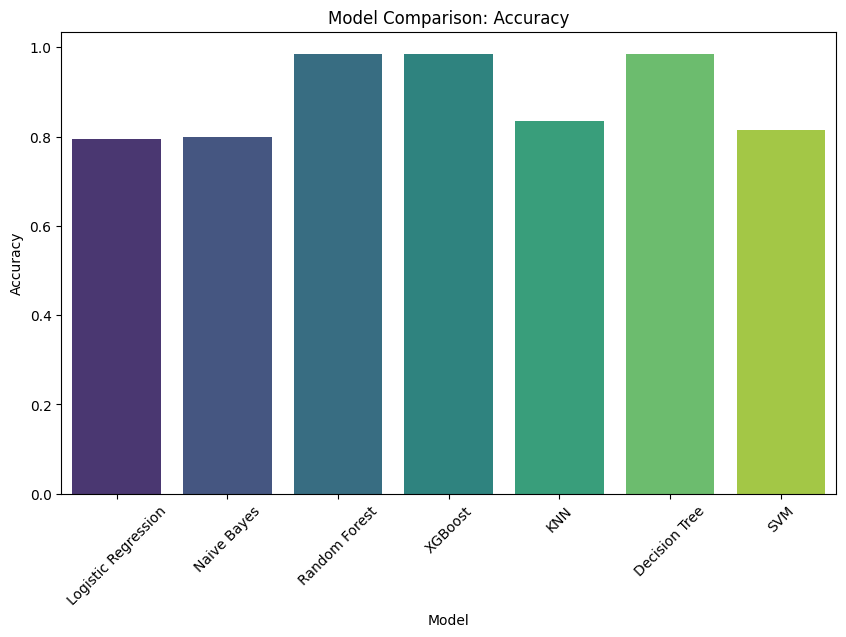

Best Model: Random Forest with Accuracy: 0.9854


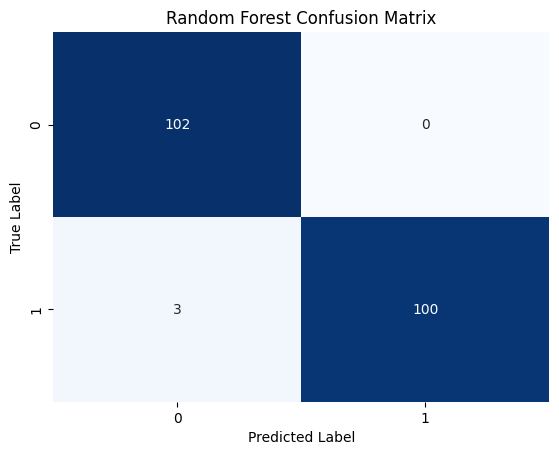

In [15]:
# Model names and accuracy scores
models = pd.Series(['Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost', 'KNN', 'Decision Tree', 'SVM'])
accuracies = [accuracy_score(y_test, lr_predictions),
              accuracy_score(y_test, nb_predictions),
              accuracy_score(y_test, rf_predictions),
              accuracy_score(y_test, xgb_predictions),
              accuracy_score(y_test, knn_predictions),
              accuracy_score(y_test, dt_predictions),
              accuracy_score(y_test, svc_predictions)]

# Create a DataFrame to store the models and their accuracies
model_comparison_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_comparison_df, palette='viridis')
plt.title("Model Comparison: Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# Confusion Matrix for the Model with Best Accuracy
# Identify the model with the highest accuracy
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost', 'KNN', 'Decision Tree', 'SVM']
accuracies = [accuracy_score(y_test, lr_predictions),
              accuracy_score(y_test, nb_predictions),
              accuracy_score(y_test, rf_predictions),
              accuracy_score(y_test, xgb_predictions),
              accuracy_score(y_test, knn_predictions),
              accuracy_score(y_test, dt_predictions),
              accuracy_score(y_test, svc_predictions)]

# Find the model with the highest accuracy
best_model_index = accuracies.index(max(accuracies))
best_model = models[best_model_index]

# Print the best model and its accuracy
print(f"Best Model: {best_model} with Accuracy: {max(accuracies):.4f}")

# Get the predictions for the best model
if best_model == 'Logistic Regression':
    best_model_predictions = lr_predictions
elif best_model == 'Naive Bayes':
    best_model_predictions = nb_predictions
elif best_model == 'XGBoost':
    best_model_predictions = xgb_predictions
elif best_model == 'Random Forest':
    best_model_predictions = rf_predictions
elif best_model == 'KNN':
    best_model_predictions = knn_predictions
elif best_model == 'Decision Tree':
    best_model_predictions = dt_predictions
else:
    best_model_predictions = svc_predictions

# Confusion Matrix for the best model
conf_matrix = confusion_matrix(y_test, best_model_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'{best_model} Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 🌟 7. Feature Importance Visualization (XGBoost)

### Why this matters:
- 💡 Understand which **features contribute the most** to model predictions.
- 🎯 Use XGBoost’s built-in feature importance tool.
- 📊 Plot a ranked bar chart to visualize the **top influential features**.

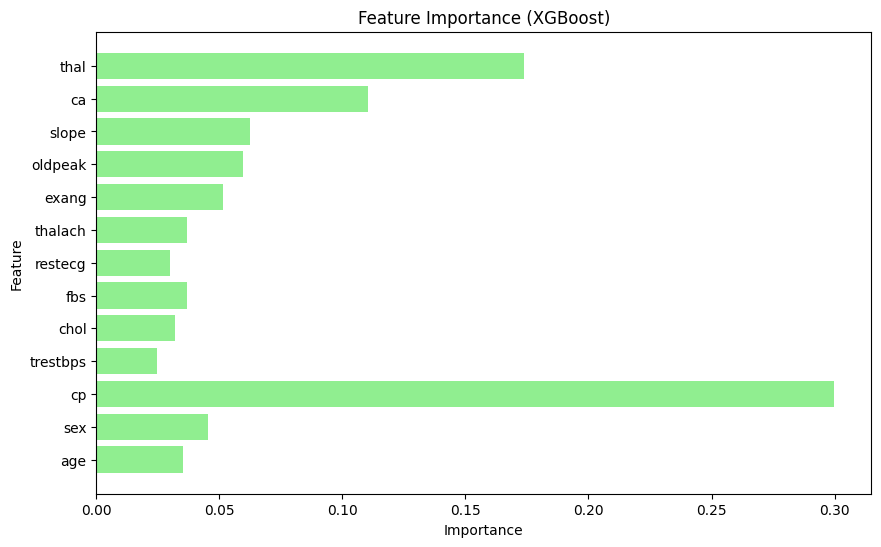

In [8]:
# Visualize Feature Importance with XGBoost
xgb_importance = xgb.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, xgb_importance, color='lightgreen')
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 🚦 8. ROC Curve for Model Evaluation

### Final evaluation step:
- 📐 Plot **ROC (Receiver Operating Characteristic) curves** for each model.
- 🟠 Analyze the **True Positive Rate vs. False Positive Rate**.
- 🏅 Use **AUC (Area Under the Curve)** scores to quantify performance.

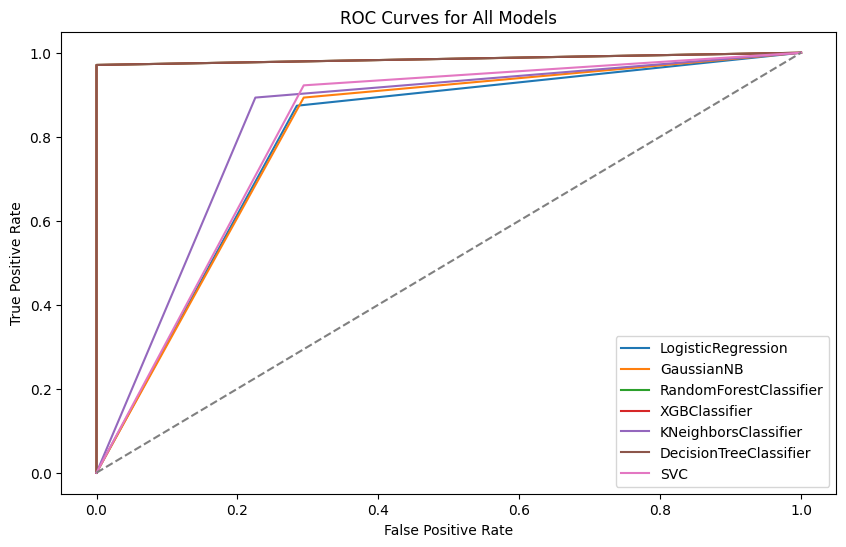

In [9]:
# ROC Curves
plt.figure(figsize=(10, 6))
for model, predictions in zip([lr, nb, rf, xgb, knn, dt, svc], 
                               [lr_predictions, nb_predictions, rf_predictions, xgb_predictions, knn_predictions, dt_predictions, svc_predictions]):
    fpr, tpr, _ = roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label=model.__class__.__name__)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal Line
plt.title("ROC Curves for All Models")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()